<a href="https://colab.research.google.com/github/BhavikDudhrejiya/Data_Science/blob/main/Feature_Selection_Based_on_Univariate_ROC_AUC_on_classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#Importing libraries for data manipulation
import pandas as pd
import numpy as np

#Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Importing library for train and test split
from sklearn.model_selection import train_test_split

#Importing library for classification
from sklearn.ensemble import RandomForestClassifier

#Importing library for accuracy
from sklearn.metrics import accuracy_score, roc_auc_score

#Importing libraries for feature selection
from sklearn.feature_selection import VarianceThreshold

In [25]:
#Enabling the full view of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [74]:
#Loading data
train = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/Data-Files-for-Feature-Selection/master/santander-train.csv', nrows = 20000)

In [75]:
#Checking the data
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [76]:
#Splitting data into X & y
X = train.drop(columns = 'TARGET', axis =1)
y = train['TARGET']

#Checking the shape of the data
print(X.shape, y.shape)

(20000, 370) (20000,)


In [77]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = y)

#Checking the shape of the data
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((16000, 370), (16000,), (4000, 370), (4000,))

We have 370 features from which We will remove constant, quasi constant and duplicate features first

#Removing constant & quasi constant features

In [78]:
#Creating constant filter
constant_filter = VarianceThreshold(threshold=0.01)

#Fitting data into constant filter
constant_filter.fit(X_train)

#Checking non-constant filter
print('Non-constant features count extract:',constant_filter.get_support().sum())

#Extracting non constant features
non_constant_features = X_train.columns[constant_filter.get_support()]
print('Non-constant features count verify:',len(non_constant_features))

#Removing constant variables from the data
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

#Converting numpy array into dataframe
X_train_filter_df = pd.DataFrame(X_train_filter, columns=non_constant_features)
X_test_filter_df = pd.DataFrame(X_test_filter, columns=non_constant_features)

#Checking the shape of the data
X_train_filter_df.shape,y_train.shape, X_test_filter_df.shape, y_test.shape

Non-constant features count extract: 253
Non-constant features count verify: 253


((16000, 253), (16000,), (4000, 253), (4000,))

#Removing duplicate features

In [79]:
#Transposing the data
X_train_T_df = X_train_filter_df.T
X_test_T_df = X_test_filter_df.T

#Extracting list duplicate features
extract_duplicate = X_train_T_df.duplicated()
print('Extracted duplicate features:',len(extract_duplicate.values[extract_duplicate.values==True]))
print('Extracted non duplicate features:',len(extract_duplicate.values[~extract_duplicate.values==True]))

#Transposing data
X_train_NT_df = X_train_T_df.T
X_test_NT_df = X_test_T_df.T

#Extracting duplicate and non duplicate features name from the list duplicate features
duplicate_features = X_train_NT_df.columns[extract_duplicate.values]
non_duplicate_features = X_test_NT_df.columns[~extract_duplicate.values]
print('Verify duplicate features:',len(duplicate_features))
print('Verify non duplicate features:',len(non_duplicate_features))

#Removing duplicate features from the data
X_train_unique_df = X_train_NT_df[non_duplicate_features]
X_test_unique_df = X_test_NT_df[non_duplicate_features]

#Checking the shape of the data
X_train_unique_df.shape, y_train.shape, X_test_unique_df.shape, y_test.shape

Extracted duplicate features: 20
Extracted non duplicate features: 233
Verify duplicate features: 20
Verify non duplicate features: 233


((16000, 233), (16000,), (4000, 233), (4000,))

In [80]:
#Checking the data
X_train_unique_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13,ind_var14_0,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var25_0,ind_var30,ind_var37_cte,ind_var37_0,ind_var39_0,ind_var41_0,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var25_0,num_op_var40_hace2,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var33_0,num_var35,num_var37_med_ult2,num_var37_0,num_var39_0,num_var41_0,num_var42_0,num_var42,num_var44_0,num_var44,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var37,saldo_var42,saldo_var44,var36,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_compra_var44_1y3,delta_num_venta_var44_1y3,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_reemb_var17_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var33_in_ult1,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_var7_recib_ult1,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var12_ult3,num_meses_var13_corto_ult3,num_meses_var13_largo_ult3,num_meses_var39_vig_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var40_comer_ult1,num_op_var40_comer_ult3,num_op_var40_efect_ult1,num_op_var40_efect_ult3,num_op_var41_comer_ult1,num_op_var41_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ul

We have removed constant, quasi constant and duplicate features

#ROC-AUC

In [81]:
#Computing ROC
roc_auc = []
for feature in X_train_unique_df.columns:
  clf = RandomForestClassifier(n_estimators=100, random_state=0)
  clf.fit(X_train_unique_df[feature].to_frame(), y_train)
  y_pred = clf.predict(X_test_unique_df[feature].to_frame())
  roc_auc.append(roc_auc_score(y_test, y_pred))

In [82]:
#Checking roc auc
print(roc_auc)

[0.492262136030993, 0.5, 0.5, 0.4997393797237425, 0.5012431427287742, 0.49765441751368256, 0.49986968986187125, 0.5, 0.5029371745244479, 0.4997393797237425, 0.5, 0.5044409375294796, 0.49739379723742505, 0.5026765542481904, 0.4997393797237425, 0.5012431427287742, 0.5028068643863192, 0.4997393797237425, 0.5012431427287742, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49986968986187125, 0.5, 0.5, 0.5, 0.49986968986187125, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5029371745244479, 0.49700286682303885, 0.5, 0.498436278342455, 0.5026765542481904, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4990878290330988, 0.4990878290330988, 0.4958300755798801, 0.5, 0.5, 0.5, 0.4988272087568413, 0.4955694553036226, 0.5, 0.5, 0.5, 0.5, 0.5, 

In [83]:
#Creating dataframe for roc auc
roc_values = pd.DataFrame()
roc_values['features'] = X_train_unique_df.columns
roc_values['roc-auc'] = roc_auc
roc_values.sort_values(by = 'roc-auc', ascending=False, inplace = True)
roc_values.reset_index(drop=True, inplace = True)

In [84]:
#Checking roc values
roc_values

,features,roc-auc
0,var38,0.517975
1,saldo_medio_var5_hace2,0.507839
2,saldo_medio_var8_ult3,0.504571
3,imp_op_var41_comer_ult1,0.504441
4,saldo_medio_var5_ult3,0.503659
5,num_op_var40_efect_ult3,0.503067
6,imp_op_var40_efect_ult1,0.502937
7,saldo_var1,0.502937
8,num_var45_hace2,0.502807
9,imp_op_var39_efect_ult1,0.502807


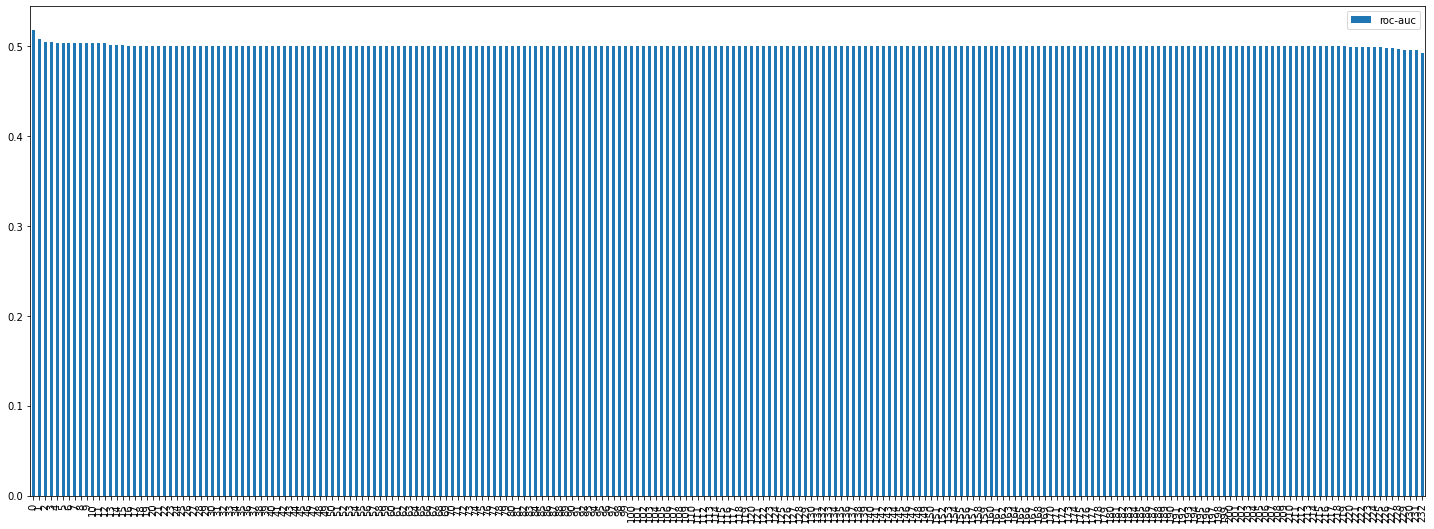

In [85]:
#Visualizing the roc-auc values
roc_values.plot.bar(figsize = (25,9));

In [86]:
#Checking roc-auc greater than 0.5
len(roc_values[roc_values['roc-auc']>0.5])

16

In [88]:
#Checking which features are greater than 0.5
sel = roc_values[roc_values['roc-auc']>0.5]['features']
sel

0                       var38
1      saldo_medio_var5_hace2
2       saldo_medio_var8_ult3
3     imp_op_var41_comer_ult1
4       saldo_medio_var5_ult3
5     num_op_var40_efect_ult3
6     imp_op_var40_efect_ult1
7                  saldo_var1
8             num_var45_hace2
9     imp_op_var39_efect_ult1
10    imp_op_var41_efect_ult1
11      saldo_medio_var8_ult1
12                saldo_var12
13          imp_op_var41_ult1
14          imp_op_var39_ult1
15    imp_op_var39_comer_ult1
Name: features, dtype: object

In [89]:
#Removing features have roc-auc value less than 0.5
X_train_roc = X_train_unique_df[sel]
X_test_roc = X_test_unique_df[sel]

#Checking the shape of the data
X_train_roc.shape, X_test_roc.shape

((16000, 16), (4000, 16))

In [94]:
#Creating function who train a model and extract accuracy
def classifier(X_train, X_test, y_train, y_test):
  rf = RandomForestClassifier(n_estimators=100, random_state=0)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

In [95]:
%%time
#Train a model & extract accuracy on the features have roc_auc value greater than 0.5
classifier(X_train_roc, X_test_roc, y_train, y_test)

CPU times: user 2.65 s, sys: 5 ms, total: 2.65 s
Wall time: 2.66 s


0.947

In [96]:
%%time
#Train a model & extract accuracy on original dataset
classifier(X_train, X_test, y_train, y_test)

CPU times: user 4.57 s, sys: 16 ms, total: 4.59 s
Wall time: 4.6 s


0.959